In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
sns.set()
import pylab
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import f1_score as f1

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.shape

(569, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
df.drop(columns=['Unnamed: 32'],inplace=True)

In [10]:
df.groupby(df['diagnosis'])['diagnosis'].value_counts()


diagnosis  diagnosis
B          B            357
M          M            212
Name: diagnosis, dtype: int64

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# 1
l=[]
for i in df['radius_mean']:
    z=(i-df['radius_mean'].min())/(df['radius_mean'].max()-df['radius_mean'].min())
    l.append(z)

In [14]:
df['Scaled_radius_mean']=pd.Series(l)

In [15]:
# 2
L=[]
for i in df['texture_mean']:
    z=(i-df['texture_mean'].min())/(df['texture_mean'].max()-df['texture_mean'].min())
    L.append(z)

In [16]:
df['Scaled_texture_mean']=pd.Series(L)

In [17]:
# 3
m=[]
for i in df['perimeter_mean']:
    z=(i-df['perimeter_mean'].min())/(df['perimeter_mean'].max()-df['perimeter_mean'].min())
    m.append(z)


In [18]:
df['Scaled_perimeter_mean']=pd.Series(m)

In [19]:
# 4
n=[]
for i in df['perimeter_se']:
    z=(i-df['perimeter_se'].min())/(df['perimeter_se'].max()-df['perimeter_se'].min())
    n.append(z)

In [20]:
df['Scaled_perimeter_se']=pd.Series(n)

In [21]:
# 5
M=[]
for i in df['area_se']:
    z=(i-df['area_se'].min())/(df['area_se'].max()-df['area_se'].min())
    M.append(z)


In [22]:
df['Scaled_area_se']=pd.Series(M)

In [23]:
# 6
N=[]
for i in df['area_mean']:
    z=(i-df['area_mean'].min())/(df['area_mean'].max()-df['area_mean'].min())
    N.append(z)

In [24]:
df['Scaled_area_mean']=pd.Series(N)

In [25]:
# 7
o=[]
for i in df['radius_worst']:
    z=(i-df['radius_worst'].min())/(df['radius_worst'].max()-df['radius_worst'].min())
    o.append(z)

In [26]:
df['Scaled_area_worst']=pd.Series(o)

In [27]:
# 8
p=[]
for i in df['texture_worst']:
    z=(i-df['texture_worst'].min())/(df['texture_worst'].max()-df['texture_worst'].min())
    p.append(z)

In [28]:
df['Scaled_texture_worst']=pd.Series(p)

In [29]:
# 9
P=[]
for i in df['perimeter_worst']:
    z=(i-df['perimeter_worst'].min())/(df['perimeter_worst'].max()-df['perimeter_worst'].min())
    P.append(z)

In [30]:
df['Scaled_perimeter_worst']=pd.Series(P)

In [31]:
# 10
Q=[]
for i in df['area_worst']:
    z=(i-df['area_worst'].min())/(df['area_worst'].max()-df['area_worst'].min())
    Q.append(z)

In [32]:
df['Scaled_area_worst']=pd.Series(Q)

In [33]:
df.drop(columns=['id','radius_mean','texture_mean','perimeter_mean','area_mean','perimeter_se','area_se','radius_worst','texture_worst','perimeter_worst','area_worst'],inplace=True)


In [34]:
df.head()

,diagnosis,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Scaled_radius_mean,Scaled_texture_mean,Scaled_perimeter_mean,Scaled_perimeter_se,Scaled_area_se,Scaled_area_mean,Scaled_area_worst,Scaled_texture_worst,Scaled_perimeter_worst
0,M,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.521037,0.022658,0.545989,0.369034,0.273811,0.363733,0.450698,0.141525,0.668310
1,M,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.643144,0.272574,0.615783,0.124440,0.125660,0.501591,0.435214,0.303571,0.539818
2,M,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.601496,0.390260,0.595743,0.180370,0.162922,0.449417,0.374508,0.360075,0.508442
3,M,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.210090,0.360839,0.233501,0.126655,0.038155,0.102906,0.094008,0.385928,0.241347
4,M,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.629893,0.156578,0.630986,0.220563,0.163688,0.489290,0.341575,0.123934,0.506948


In [36]:
df.shape

(569, 30)

In [37]:
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})

In [39]:
df.tail()

,diagnosis,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Scaled_radius_mean,Scaled_texture_mean,Scaled_perimeter_mean,Scaled_perimeter_se,Scaled_area_se,Scaled_area_mean,Scaled_area_worst,Scaled_texture_worst,Scaled_perimeter_worst
564,1,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.690000,0.428813,0.678668,0.325873,0.283710,0.566490,0.452664,0.383262,0.576174
565,1,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.622320,0.626987,0.604036,0.209490,0.172279,0.474019,0.379915,0.699094,0.520892
566,1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.455251,0.621238,0.445788,0.125713,0.077976,0.303118,0.230731,0.589019,0.379949
567,1,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.644564,0.663510,0.665538,0.236300,0.148335,0.475716,0.402035,0.730277,0.668310
568,0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0.036869,0.501522,0.028540,0.084390,0.023063,0.015907,0.020497,0.489072,0.043578


In [42]:
X=df.drop(columns='diagnosis')
Y=df[['diagnosis']]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=1200)

In [45]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\Deepanshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [46]:
y_pred=lm.predict(x_test)

In [47]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
accuracy_score(y_test,y_pred)

0.9300699300699301

In [49]:
confusion_matrix(y_test,y_pred)

array([[96,  6],
       [ 4, 37]], dtype=int64)

In [51]:
auc=roc_auc_score(y_test,y_pred)

In [53]:
auc

0.9218077474892395

In [54]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

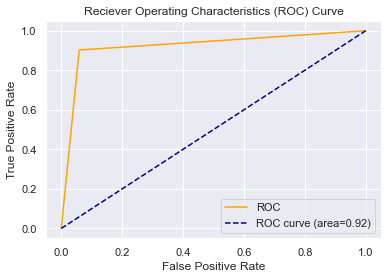

In [55]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()


In [56]:
f1(y_test,y_pred)

0.8809523809523809